<a href="https://colab.research.google.com/github/Dhruvp187/Assignment_3_part_3_4/blob/main/pmalani_dpatel27_assignment3_part3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

Part-3 Building a CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
import random


In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

visualization Graph(1)

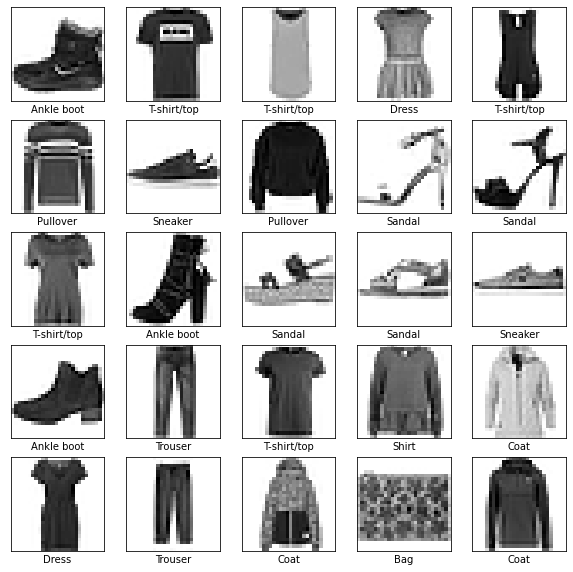

In [ ]:
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[Y_train[i]])

plt.show()

In [ ]:
xtr = pd.DataFrame(X_train.reshape(60000, (28*28)))
xts = pd.DataFrame(X_test.reshape(10000, (28*28)))

In [ ]:
xtr.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [ ]:
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
np.random.seed(123)

In [ ]:
y_train.shape

(60000, 10)

CNN Model

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.04))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 18s 16ms/step - loss: 0.6442 - accuracy: 0.7820 - val_loss: 0.3804 - val_accuracy: 0.8641
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3424 - accuracy: 0.8763 - val_loss: 0.3112 - val_accuracy: 0.8870
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2843 - accuracy: 0.8973 - val_loss: 0.2778 - val_accuracy: 0.9021
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2480 - accuracy: 0.9104 - val_loss: 0.2694 - val_accuracy: 0.9056
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2261 - accuracy: 0.9169 - val_loss: 0.2739 - val_accuracy: 0.9046
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2033 - accuracy: 0.9247 - val_loss: 0.2641 - val_accuracy: 0.9084
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1931 - accuracy: 0.9279 - val_loss: 0.2541 - val_accuracy: 0.911

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1187 - accuracy: 0.9561
The accuracy of the Training data set is  95.60999870300293
313/313 [==============================] - 1s 4ms/step - loss: 0.2501 - accuracy: 0.9156
The accuracy of the Test data set is  91.56000018119812


In [ ]:
pred = model.predict(x_test)
print(pred)

pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[3.1457629e-12 3.0759271e-13 2.9679820e-12 ... 1.4880154e-04
  2.8697179e-12 9.9984896e-01]
 [2.1513156e-06 1.4604386e-14 9.9974996e-01 ... 5.2073237e-19
  3.1593003e-11 1.6873178e-18]
 [6.5146387e-12 1.0000000e+00 8.7725834e-14 ... 1.1719476e-18
  5.1751431e-16 8.0782285e-22]
 ...
 [3.3191271e-14 1.0125920e-20 3.8296628e-16 ... 6.7293007e-15
  1.0000000e+00 1.3494109e-21]
 [3.2712327e-12 1.0000000e+00 1.4034903e-12 ... 6.2028578e-19
  5.8391153e-16 4.1958468e-19]
 [1.5274431e-04 4.6732089e-06 1.4734019e-06 ... 4.9059871e-03
  3.1333027e-04 6.5937355e-05]]
[9 2 1 ... 8 1 5]


visualizing the Predicted Images  (Visualization Graph 2)

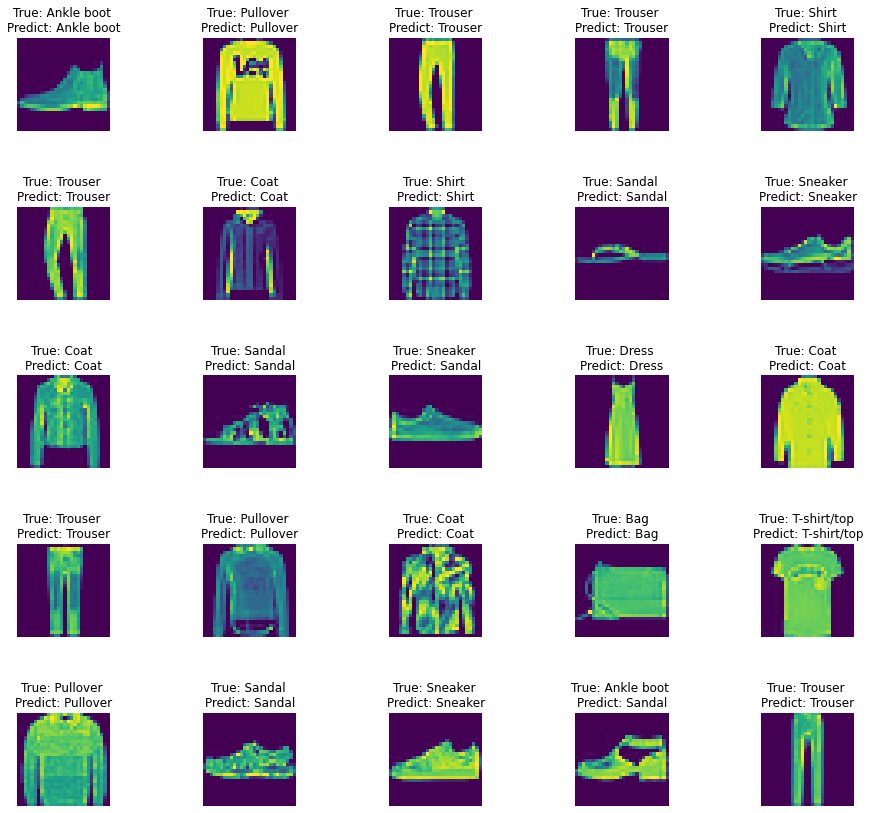

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
x_test_img = x_test.reshape(10000,28,28)

for i in np.arange(0, 25):
    axes[i].imshow(x_test_img[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

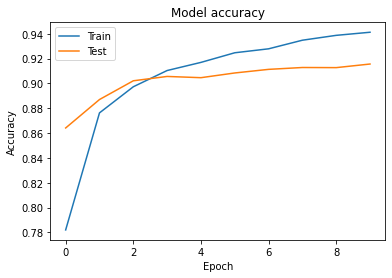

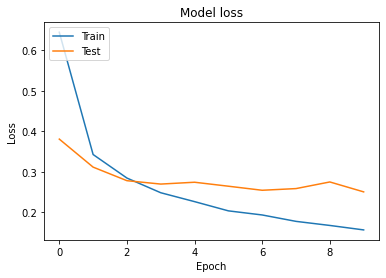

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Checking the CNN Model with the improvement methods

Gradient CLipping

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Batch Normalization

In [ ]:
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
model.summary()

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Base CNN model is the one above as we got the Accuracy of 92.01

Kernel Regularization

In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_initializer="he_uniform", kernel_size=3, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001),input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(Conv2D(128,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10,kernel_initializer="he_uniform", activation='sigmoid',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Early Stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128,callbacks=[callback])

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Part 4 - Optimizing The CNN that gave the best accuracy after checking for improvement methods. CNN model with Batch normalization gave the best accuracy

Optimizer Nadam

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Optimizer RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Optimizer Adagrad


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Optimizer RMSprop gives the best accuracy for this model.

Activation Function - Softmax

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.4569 - accuracy: 0.8360 - val_loss: 0.3952 - val_accuracy: 0.8603
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2841 - accuracy: 0.8967 - val_loss: 0.3352 - val_accuracy: 0.8872
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2373 - accuracy: 0.9141 - val_loss: 0.2663 - val_accuracy: 0.9054
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2076 - accuracy: 0.9241 - val_loss: 0.2851 - val_accuracy: 0.8986
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1803 - accuracy: 0.9339 - val_loss: 0.2889 - val_accuracy: 0.9087
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1616 - accuracy: 0.9399 - val_loss: 0.2592 - val_accuracy: 0.9166
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1439 - accuracy: 0.9470 - val_loss: 0.2712 - val_accuracy: 0.917

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9701
The accuracy of the Training data set is  97.00999855995178
313/313 [==============================] - 1s 4ms/step - loss: 0.2610 - accuracy: 0.9245
The accuracy of the Test data set is  92.44999885559082


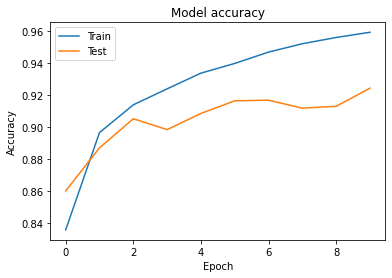

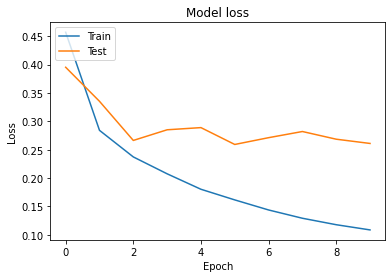

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Activation Function - Softplus

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softplus'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4426 - accuracy: 0.8409 - val_loss: 0.4233 - val_accuracy: 0.8390
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2749 - accuracy: 0.8998 - val_loss: 0.2902 - val_accuracy: 0.8930
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2295 - accuracy: 0.9169 - val_loss: 0.2829 - val_accuracy: 0.8933
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2029 - accuracy: 0.9254 - val_loss: 0.2514 - val_accuracy: 0.9163
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1802 - accuracy: 0.9338 - val_loss: 0.2932 - val_accuracy: 0.9050
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1594 - accuracy: 0.9403 - val_loss: 0.2755 - val_accuracy: 0.9121
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1452 - accuracy: 0.9461 - val_loss: 0.3246 - val_accuracy: 0.9102

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9693
The accuracy of the Training data set is  96.92833423614502
313/313 [==============================] - 1s 4ms/step - loss: 0.2634 - accuracy: 0.9213
The accuracy of the Test data set is  92.12999939918518


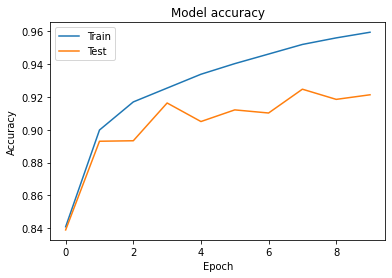

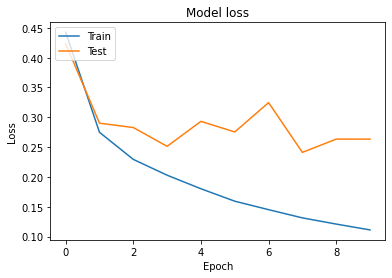

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Activation Function - sigmoid

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4704 - accuracy: 0.8333 - val_loss: 0.3848 - val_accuracy: 0.8669
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2892 - accuracy: 0.8953 - val_loss: 0.3156 - val_accuracy: 0.8820
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2446 - accuracy: 0.9105 - val_loss: 0.2812 - val_accuracy: 0.9036
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2136 - accuracy: 0.9207 - val_loss: 0.3065 - val_accuracy: 0.9021
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1920 - accuracy: 0.9300 - val_loss: 0.2714 - val_accuracy: 0.9041
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1695 - accuracy: 0.9378 - val_loss: 0.2464 - val_accuracy: 0.9187
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1517 - accuracy: 0.9444 - val_loss: 0.2678 - val_accuracy: 0.9158

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9650
The accuracy of the Training data set is  96.4983344078064
313/313 [==============================] - 1s 4ms/step - loss: 0.2844 - accuracy: 0.9188
The accuracy of the Test data set is  91.87999963760376


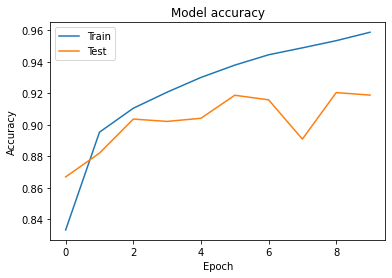

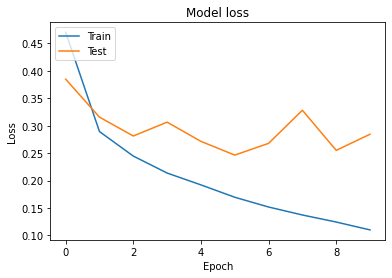

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Activation Function softmax gives the best accuracy for this model

Dropuout of 4%

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.04))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4568 - accuracy: 0.8349 - val_loss: 0.5617 - val_accuracy: 0.8006
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2785 - accuracy: 0.8993 - val_loss: 0.3150 - val_accuracy: 0.8872
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2279 - accuracy: 0.9167 - val_loss: 0.3154 - val_accuracy: 0.8916
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1923 - accuracy: 0.9305 - val_loss: 0.3142 - val_accuracy: 0.8916
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1682 - accuracy: 0.9378 - val_loss: 0.2599 - val_accuracy: 0.9110
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1497 - accuracy: 0.9442 - val_loss: 0.2721 - val_accuracy: 0.9120
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1295 - accuracy: 0.9526 - val_loss: 0.2670 - val_accuracy: 0.9207

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - accuracy: 0.9570
The accuracy of the Training data set is  95.701664686203
313/313 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.9041
The accuracy of the Test data set is  90.41000008583069


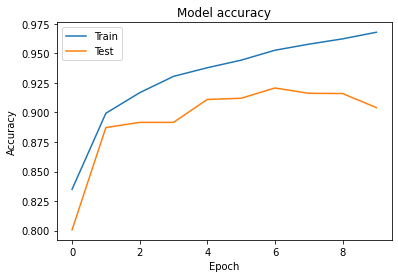

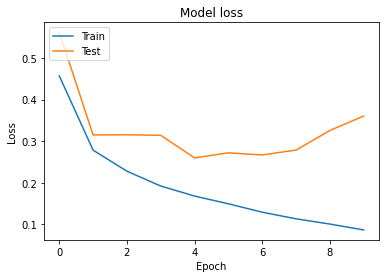

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Dropout of 10%

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4845 - accuracy: 0.8262 - val_loss: 0.5217 - val_accuracy: 0.8317
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.3017 - accuracy: 0.8902 - val_loss: 0.3099 - val_accuracy: 0.8882
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2517 - accuracy: 0.9070 - val_loss: 0.3126 - val_accuracy: 0.8922
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2234 - accuracy: 0.9185 - val_loss: 0.2485 - val_accuracy: 0.9087
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1983 - accuracy: 0.9273 - val_loss: 0.2608 - val_accuracy: 0.9128
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1786 - accuracy: 0.9338 - val_loss: 0.2491 - val_accuracy: 0.9169
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1664 - accuracy: 0.9391 - val_loss: 0.2375 - val_accuracy: 0.9241

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0831 - accuracy: 0.9699
The accuracy of the Training data set is  96.99333310127258
313/313 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.9210
The accuracy of the Test data set is  92.10000038146973


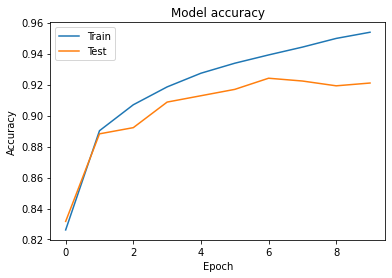

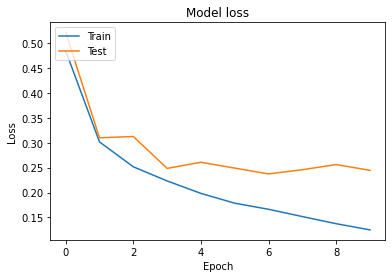

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Dropout of 7%

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.4557 - accuracy: 0.8359 - val_loss: 0.3541 - val_accuracy: 0.8725
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2822 - accuracy: 0.8972 - val_loss: 0.3673 - val_accuracy: 0.8787
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2373 - accuracy: 0.9121 - val_loss: 0.3442 - val_accuracy: 0.8884
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2095 - accuracy: 0.9231 - val_loss: 0.2530 - val_accuracy: 0.9136
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1838 - accuracy: 0.9320 - val_loss: 0.2524 - val_accuracy: 0.9128
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1653 - accuracy: 0.9380 - val_loss: 0.2506 - val_accuracy: 0.9146
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1478 - accuracy: 0.9453 - val_loss: 0.2240 - val_accuracy: 0.926

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0703 - accuracy: 0.9746
The accuracy of the Training data set is  97.45833277702332
313/313 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.9228
The accuracy of the Test data set is  92.28000044822693


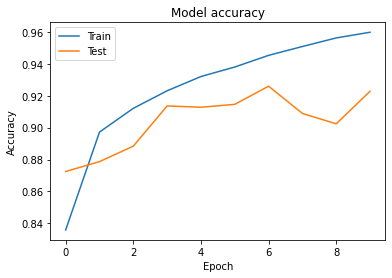

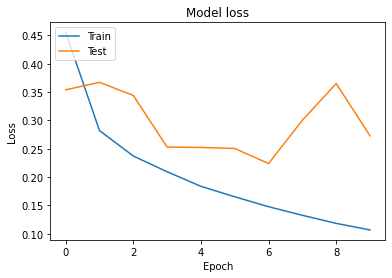

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Dropout of 7% gave the best accuracy for this model

***Final CNN Model after optimization***
With Dropout - 0.07,
Activation Function - softmax,
optimizer - RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4544 - accuracy: 0.8362 - val_loss: 0.3448 - val_accuracy: 0.8753
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2854 - accuracy: 0.8956 - val_loss: 0.2928 - val_accuracy: 0.8974
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2391 - accuracy: 0.9130 - val_loss: 0.2730 - val_accuracy: 0.9052
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2059 - accuracy: 0.9235 - val_loss: 0.2305 - val_accuracy: 0.9185
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1814 - accuracy: 0.9333 - val_loss: 0.2935 - val_accuracy: 0.8943
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1656 - accuracy: 0.9394 - val_loss: 0.2489 - val_accuracy: 0.9228
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1460 - accuracy: 0.9459 - val_loss: 0.2693 - val_accuracy: 0.9162

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0745 - accuracy: 0.9721
The accuracy of the Training data set is  97.20666408538818
313/313 [==============================] - 1s 4ms/step - loss: 0.2573 - accuracy: 0.9262
The accuracy of the Test data set is  92.61999726295471


The imporved accuracy after optimizing the CNN model is 92.61 that is > than the accuracy of the base CNN model(92.01)

Data Augmentation

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
onehoty_train = encoder.fit_transform(y_train)

encoder1 = OneHotEncoder(drop='first', sparse=False)
onehoty_test = encoder1.fit_transform(y_test)


print(onehoty_train.shape, onehoty_test.shape)


(60000, 10) (10000, 10)


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range = 90)

Visualization Graph 3

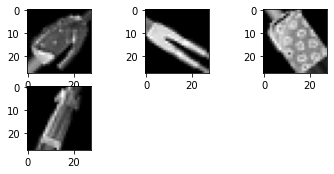

In [ ]:
b = datagen.fit(x_train)
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=4):
	for i in range(0, 4):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()

	break

In [ ]:
augmented_data = datagen.flow(x_train, onehoty_train, batch_size=60000)
x_train_new = np.copy(x_train)
y_train_new = np.copy(onehoty_train)
for i in range(3):
  augmented_images = augmented_data.next()
  x_train_new = np.concatenate((x_train_new, augmented_images[0]))
  y_train_new = np.concatenate((y_train_new, augmented_images[1]))



In [ ]:
print(x_train_new.shape, y_train_new.shape)

(240000, 28, 28, 1) (240000, 10)


In [ ]:
datagen2 = ImageDataGenerator(rotation_range = 90)

In [ ]:
augmented_data_test = datagen.flow(x_test, onehoty_test, batch_size=10000)
x_test_new = np.copy(x_test)
y_test_new = np.copy(onehoty_test)
for i in range(3):
  augmented_images1 = augmented_data_test.next()
  x_test_new = np.concatenate((x_test_new, augmented_images1[0]))
  y_test_new = np.concatenate((y_test_new, augmented_images1[1]))

In [ ]:
print(x_test_new.shape, y_test_new.shape)

(40000, 28, 28, 1) (40000, 10)


Increased the dataset by x4 using data augmentation techniques and checking the accuracy of the CNN model

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=10, batch_size=128)

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.6017 - accuracy: 0.7818 - val_loss: 0.5223 - val_accuracy: 0.8058
Epoch 2/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.3832 - accuracy: 0.8616 - val_loss: 0.4001 - val_accuracy: 0.8551
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3228 - accuracy: 0.8834 - val_loss: 0.3656 - val_accuracy: 0.8659
Epoch 4/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2857 - accuracy: 0.8966 - val_loss: 0.3375 - val_accuracy: 0.8813
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2555 - accuracy: 0.9077 - val_loss: 0.3335 - val_accuracy: 0.8848
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2332 - accuracy: 0.9157 - val_loss: 0.2963 - val_accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2117 - accuracy: 0.9233 - val_loss: 0.3249 -

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1072 - accuracy: 0.9614
The accuracy of the Training data set is  96.14499807357788
313/313 [==============================] - 4s 10ms/step - loss: 0.2526 - accuracy: 0.9147
The accuracy of the Test data set is  91.46999716758728


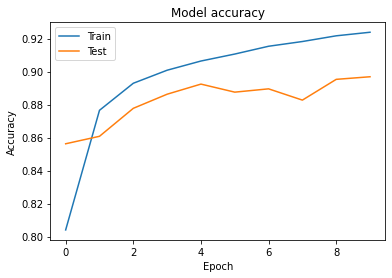

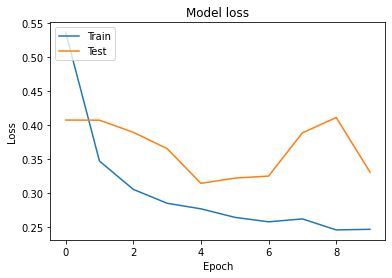

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()